# Wallet Network Projections Analysis 

This Notebook shows general properties of the validated Token network projections

In [7]:
import pandas as pd
import numpy as np
import networkx as nx 

import matplotlib.pyplot as plt
from ast import literal_eval

from os.path import join
import os

# from token_projection.token_projection import *
# from utilities.metrics_and_tests import * 
# from utilities.utils import * 

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("../data/final_token_selection.csv")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
address_to_symbol

# df_tokens = pd.read_csv('../assets/df_final_token_selection_20230813.csv')

# remove burner addresses 
known_burner_addresses = ['0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000001',
                        '0x0000000000000000000000000000000000000002',
                        '0x0000000000000000000000000000000000000003',
                        '0x0000000000000000000000000000000000000004',
                        '0x0000000000000000000000000000000000000005',
                        '0x0000000000000000000000000000000000000006',
                        '0x0000000000000000000000000000000000000007',
                        '0x000000000000000000000000000000000000dead']

### NOTE: YOU NEED TO RE-RUN TOKEN VALIDATION --> REMOVAL OF BITDAO CAUSED THIS.
### ALSO DOUBLE CHECK THAT BITDAO IS THE PROBLEM AND NOT AURA !!! 


In [8]:
import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

## Visualise Network Projection of Snapshot over time

In [9]:
input_directory = os.path.join(path, '../data/validated_wallet_projection_graphs')
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

Graph file for snapshot 7962629 does not exist.
Graph file for snapshot 8155117 does not exist.
Graph file for snapshot 8354625 does not exist.
Graph file for snapshot 8553607 does not exist.
Graph file for snapshot 8745378 does not exist.
Graph file for snapshot 8938208 does not exist.
Graph file for snapshot 9110216 does not exist.
Graph file for snapshot 9285458 does not exist.
Graph file for snapshot 9487426 does not exist.
Graph file for snapshot 9676110 does not exist.
Graph file for snapshot 9877036 does not exist.
Graph file for snapshot 10070789 does not exist.
Graph file for snapshot 10270349 does not exist.
Graph file for snapshot 10467362 does not exist.
Graph file for snapshot 10664157 does not exist.
Graph file for snapshot 10866666 does not exist.
Graph file for snapshot 11060222 does not exist.
Graph file for snapshot 11262275 does not exist.
Graph file for snapshot 11457486 does not exist.


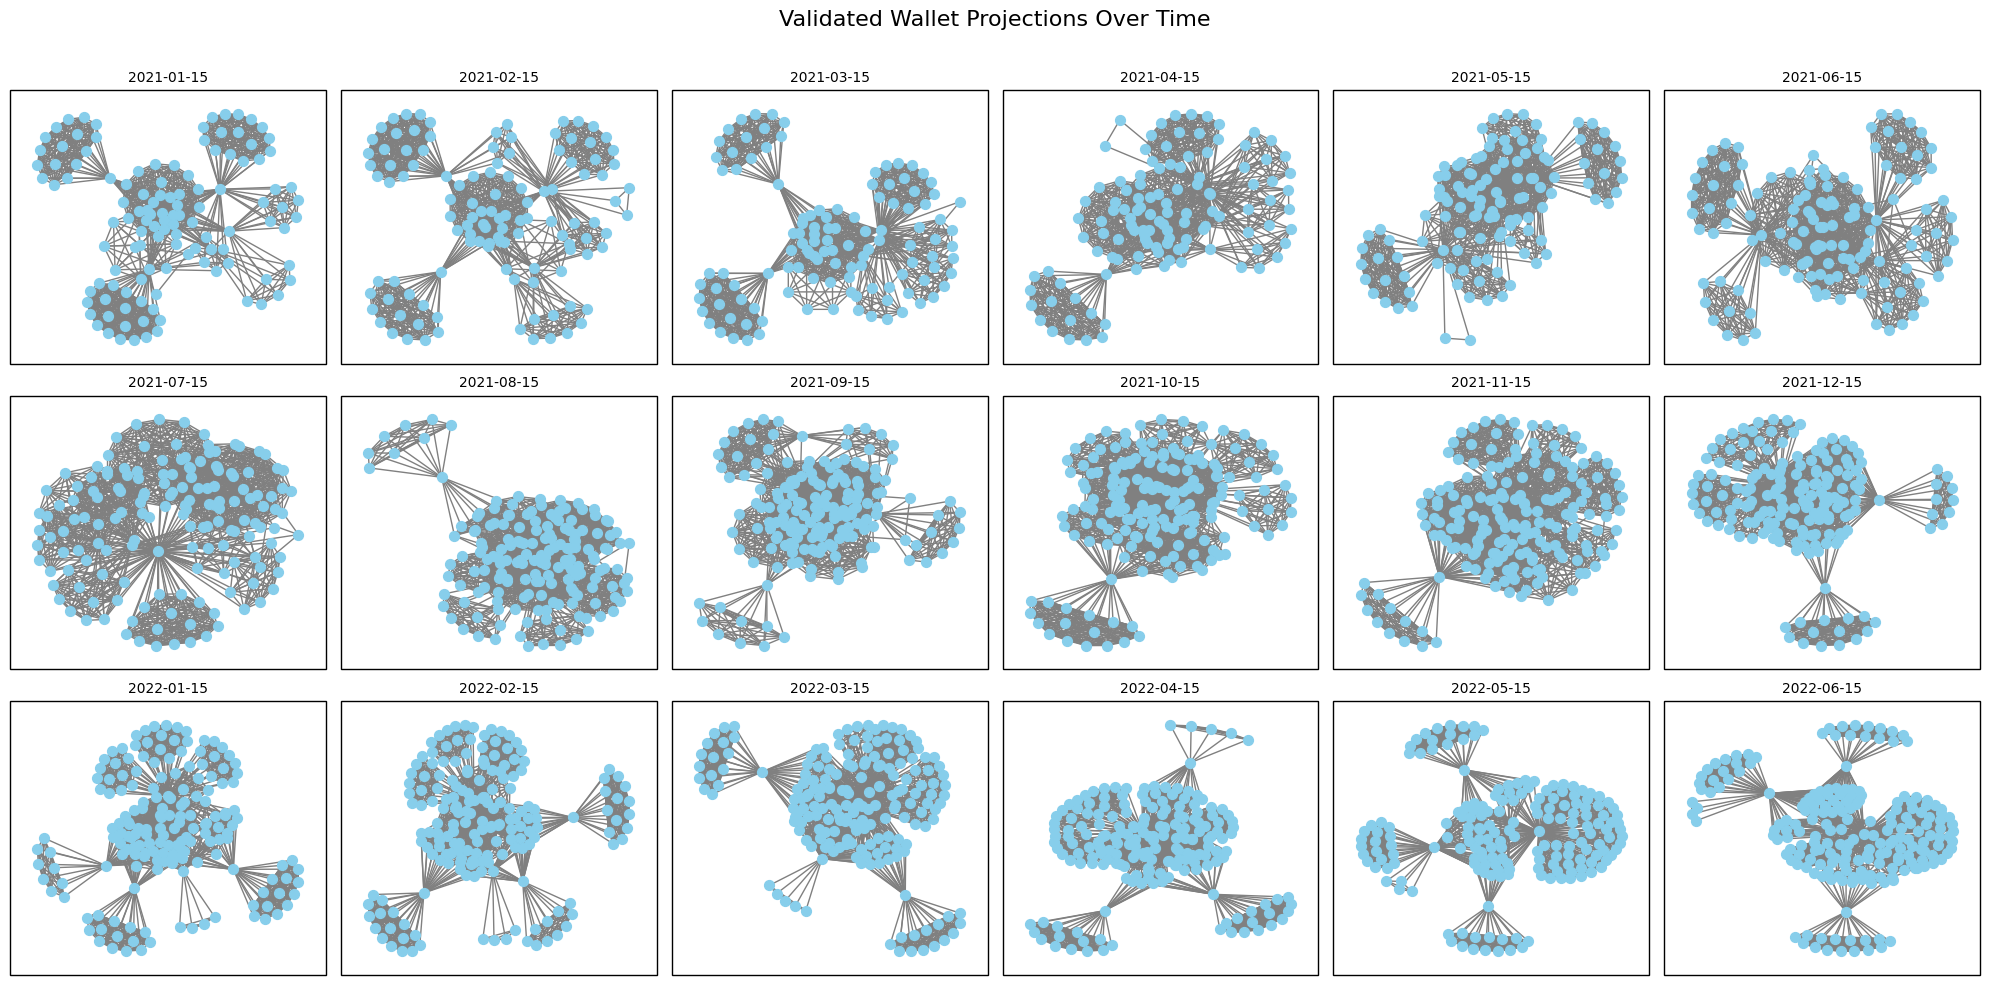

In [10]:
visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='../output/wallet_network_projections/', layout=nx.kamada_kawai_layout)


## Jaccard Similarity of Validated Network Projection over time 

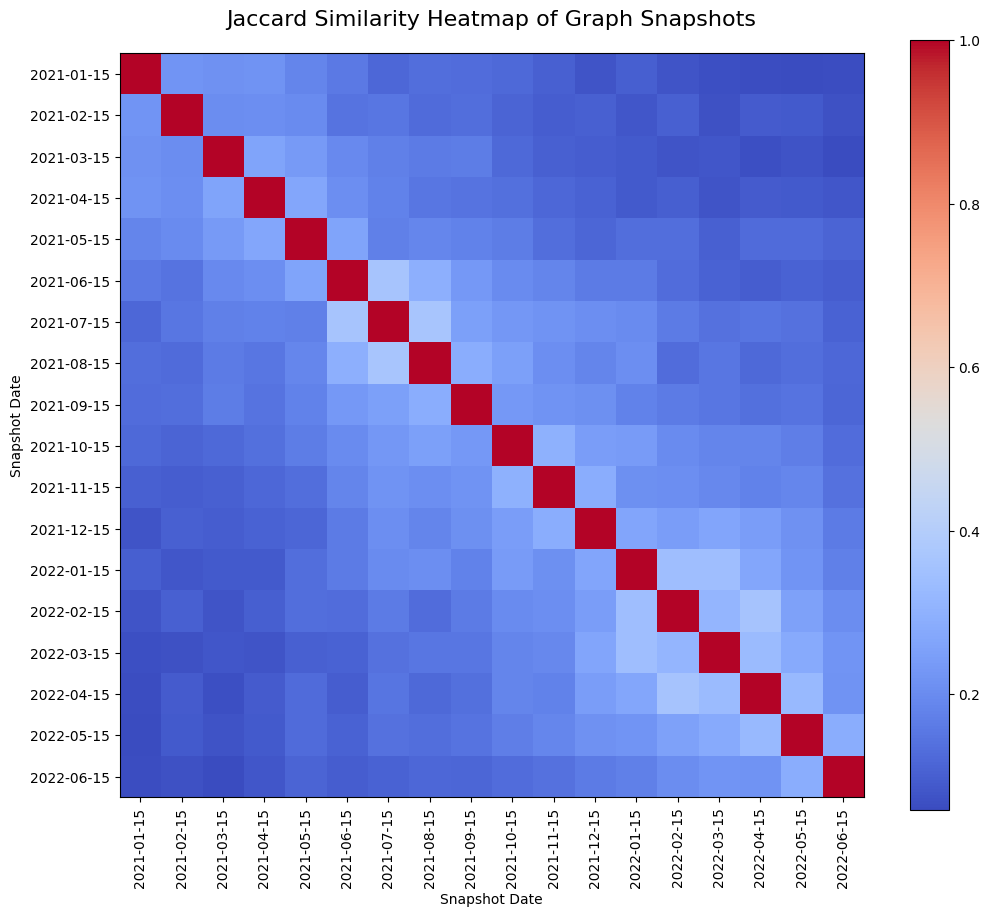

In [11]:
similarity_matrix, snapshot_list = calculate_similarity_matrix(graphs)

plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory='../output/wallet_network_projections/')